In [27]:
import pickle

import numpy as np
from sklearn.preprocessing import StandardScaler

from custom_transformers.stability_selection import StabilitySelection, StabilitySelectionTransformer
from custom_transformers.standard_true_false import standard_true_false

In [3]:
seed = 15
np.random.seed(seed)

In [4]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]
    X_gpa = standard_true_false.fit_transform(DATA["X_gpa"])
    X_snps = standard_true_false.fit_transform(DATA["X_snps"])
    X_genexp = StandardScaler().fit_transform(DATA["X_genexp"])

In [5]:
X_gpa_genexp = np.concatenate([X_gpa, X_genexp], axis=1)
X_snps_genexp = np.concatenate([X_snps, X_genexp], axis=1)
X_gpa_snps = np.concatenate([X_gpa, X_snps], axis=1)
X_all = np.concatenate([X_gpa, X_snps, X_genexp], axis=1)
y = pheno["Tobramycin"].to_numpy()

In [6]:
with open("./stability_scores__Tobramycin.pkl", "rb") as f:
    stability_scores = pickle.load(f)
stab_sel_trans = StabilitySelectionTransformer(stability_scores=stability_scores)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

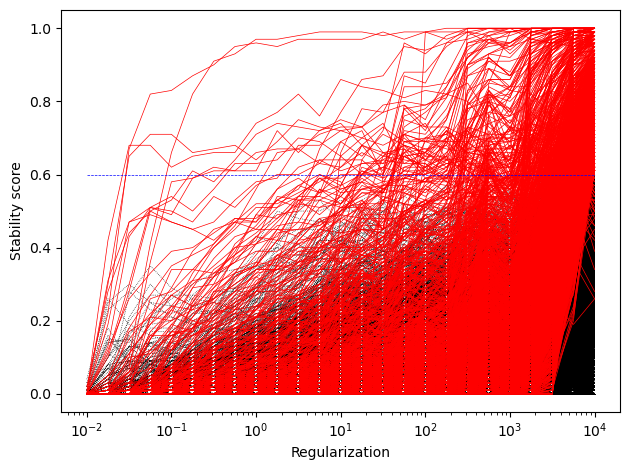

In [31]:
stab_sel = StabilitySelection(stability_scores=stab_sel_trans.stability_scores[88241])
stab_sel.plot_path()

In [25]:
X_gpa.shape

(414, 16005)

In [32]:
stab_sel_trans.fit_transform(X_gpa).shape

(414, 1051)